ДЗ_04 Бернатович

С использованием библиотек Numpy и Pandas написать программу реализующую:

1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
3. Подсчет длин предложений и их количества.
4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
5. Построение гистограммы частоты встречаемости слов.

1. загрузим текст
2. посчитаем предложения (модуль textblob)
3. функция lem(doc) выводит список подготовленных слов (re,  pymorphy2, nltk)
4. подсчет частоты слов (Counter)
5. DataFrame
6. график  matplotlib.pyplot


In [1]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [244]:
with open('D:\Data Sciense курсы\DS3onl\Bernatovich Ekaterina\ДЗ_04\dt.txt', 'r', encoding='utf-8') as g:
    text=g.read()

In [245]:
from textblob import TextBlob
from textblob import Word

In [246]:
#посчитаем количество предложений
blob = TextBlob(text)
len(blob.sentences)

187

In [247]:
#посчитаем количество слов в предложениях
len_sentences=[]
for i in range(len(blob.sentences)): 
    len_sentences.append(len(blob.sentences[i].split(' ')))
print(len_sentences)
    


[6, 5, 10, 56, 65, 8, 30, 6, 15, 12, 15, 40, 56, 40, 24, 57, 35, 2, 4, 2, 62, 1, 1, 10, 3, 31, 5, 58, 42, 33, 52, 65, 1, 8, 48, 8, 18, 157, 5, 11, 38, 11, 7, 43, 8, 41, 10, 49, 29, 7, 31, 23, 17, 22, 5, 47, 9, 18, 9, 23, 5, 6, 18, 41, 34, 23, 15, 59, 5, 4, 32, 7, 19, 30, 6, 4, 22, 42, 3, 47, 59, 20, 7, 63, 32, 14, 7, 105, 11, 39, 26, 22, 10, 8, 8, 6, 16, 4, 2, 9, 7, 14, 6, 6, 8, 20, 17, 5, 8, 10, 1, 17, 29, 33, 23, 31, 29, 49, 9, 51, 31, 7, 13, 27, 13, 11, 11, 20, 15, 34, 30, 2, 9, 8, 2, 26, 35, 6, 7, 1, 27, 18, 22, 33, 4, 15, 36, 10, 46, 10, 18, 6, 14, 44, 65, 7, 20, 2, 9, 23, 28, 23, 13, 12, 4, 3, 9, 6, 15, 5, 5, 7, 16, 13, 12, 4, 8, 13, 11, 8, 21, 6, 8, 5, 38, 14, 45]


In [248]:
import re

from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

away = "[A-Za-z0-9!#$%&'()*©®»«–+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lem(doc):
    doc = re.sub(away, ' ', doc)
    words = []
    for word in doc.split():
        if word and word not in stopwords_ru:
            word = word.strip()
            word = morph.normal_forms(word)[0]
            words.append(word)
    return words

In [249]:
text=lem(text)

In [250]:
print(text)

['часть', 'абсурд', 'освобождать', 'сковывать', 'альбер', 'камю', 'глава', 'первый', 'мальчик', 'череп', 'тогда', 'амстердам', 'впервые', 'год', 'присниться', 'мама', 'уже', 'неделя', 'безвылазно', 'сидеть', 'отель', 'бояться', 'позвонить', 'кто', 'выйти', 'номер', 'сердце', 'трепыхаться', 'подпрыгивать', 'самый', 'невинный', 'звук', 'звяканье', 'лифт', 'дребезжание', 'тележка', 'бутылочка', 'минибар', 'колокольный', 'звон', 'доноситься', 'церковь', 'крейтберг', 'башня', 'вестерторный', 'звучать', 'мрачный', 'лязганье', 'возвещать', 'сказка', 'грядущий', 'погибель', 'день', 'сидеть', 'кровать', 'из', 'сила', 'пытаться', 'разобрать', 'голландский', 'новость', 'телевизор', 'бесполезно', 'голландски', 'знать', 'слово', 'затем', 'сдаваться', 'садиться', 'окно', 'кутаться', 'набросить', 'плечо', 'пальто', 'верблюжий', 'шерсть', 'часами', 'глядеть', 'канал', 'уезжать', 'нью', 'йорк', 'спешка', 'вещь', 'который', 'привезти', 'себя', 'спасать', 'холод', 'помещение', 'за', 'окно', 'исполнить', 

In [251]:
from collections import Counter
f = Counter(text)

In [252]:
type(f)

collections.Counter

In [253]:
res=pd.DataFrame.from_dict(f, orient='index').rename(columns={0:'Qunatity'})

In [254]:
print(res)

              Qunatity
часть                4
абсурд               1
освобождать          1
сковывать            1
альбер               1
...                ...
уборщик              1
выплёскивать         1
ведро                1
мыло                 1
пола                 1

[1535 rows x 1 columns]


In [255]:
import matplotlib.pyplot as plt

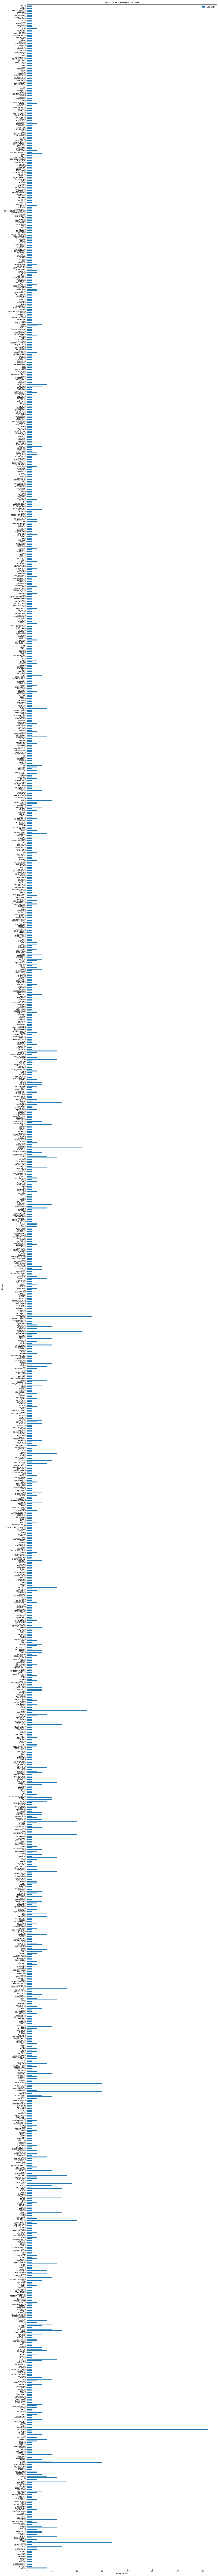

In [257]:
res.plot.barh(figsize=(18,250))
plt.title('Частота встречаемости слов') # заголовок гистограммы
plt.ylabel('Слова') # y-метка
plt.xlabel('Количество') # x-метка
plt.show()